In [149]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [150]:
#from google.colab import files
#uploaded = files.upload()

In [151]:
station_8779 = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/station_8779/59_gata_8779.csv'

In [152]:
station_8779 = pd.read_csv(station_8779 ,sep=';', skiprows=13, parse_dates=['Start'], index_col= 'Start')

In [153]:
station_8779.shape

(52584, 6)

In [154]:
station_8779.head()

,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181)
Start,,,,,,
2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7
2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3
2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6
2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5
2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6


In [155]:
#Column/Feature Names
station_8779.columns

Index(['Slut', 'CO (185)', 'NO2 (183)', 'NOX as NO2 (184)', 'PM10 (182)',
       'PM2.5 (181)'],
      dtype='object')

In [156]:
#Missing /Null values
station_8779.isnull().sum()

Slut                   0
CO (185)            3552
NO2 (183)            841
NOX as NO2 (184)     645
PM10 (182)          2156
PM2.5 (181)         6732
dtype: int64

In [157]:
#summary of each column in the dataframe
station_8779.describe()

,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181)
count,49032.000000,51743.000000,51939.000000,50428.000000,45852.000000
mean,0.335007,33.604750,66.411269,19.759548,5.688373
std,0.388743,23.285529,65.941538,18.367639,5.272743
min,0.040000,0.400000,0.100000,-3.000000,-3.000000
25%,0.230000,15.800000,22.100000,9.100000,2.400000
50%,0.300000,28.000000,44.500000,14.600000,4.700000
75%,0.380000,46.200000,87.900000,23.700000,7.700000
max,20.700000,212.800000,982.500000,324.500000,105.000000


In [158]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table




In [159]:
missing_zero_values_table(station_8779)

Your selected dataframe has 6 columns and 52584 Rows.
There are 5 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PM2.5 (181),236,6732,12.8,6968,13.3,float64
CO (185),0,3552,6.8,3552,6.8,float64
PM10 (182),22,2156,4.1,2178,4.1,float64
NO2 (183),0,841,1.6,841,1.6,float64
NOX as NO2 (184),0,645,1.2,645,1.2,float64


**Merging Meteorological data**

#Adding Meteorological Data



**Adding Temperature Data**

In [160]:
#uploaded = files.upload()
temp_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/stockholmA-temp.csv'

In [161]:
temp_data = pd.read_csv(temp_data, sep=';', skiprows=9)
temp_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1996-10-01,00:00:00,10.2,G,NaN,Kvalitetskontrollerade historiska data (utom d...
1,1996-10-01,01:00:00,9.7,Y,NaN,Tidsperiod (fr.o.m.) = 1996-10-01 00:00:00 (UTC)
2,1996-10-01,03:00:00,9.9,G,NaN,Tidsperiod (t.o.m.) = 2020-06-01 06:00:00 (UTC)
3,1996-10-01,04:00:00,9.9,Y,NaN,Samplingstid = Ej angivet
4,1996-10-01,05:00:00,9.9,Y,NaN,NaN


In [162]:
temp_data.columns

Index(['Datum', 'Tid (UTC)', 'Lufttemperatur', 'Kvalitet', 'Unnamed: 4',
       'Tidsutsnitt:'],
      dtype='object')

In [163]:
cols_name = ['Datum', 'Tid (UTC)', 'Lufttemperatur']
temp_data = temp_data[cols_name]

In [164]:
temp_data.head()

,Datum,Tid (UTC),Lufttemperatur
0,1996-10-01,00:00:00,10.2
1,1996-10-01,01:00:00,9.7
2,1996-10-01,03:00:00,9.9
3,1996-10-01,04:00:00,9.9
4,1996-10-01,05:00:00,9.9


In [165]:
temp_data['Date'] = temp_data['Datum']+' '+ temp_data['Tid (UTC)']
temp_data.head()

,Datum,Tid (UTC),Lufttemperatur,Date
0,1996-10-01,00:00:00,10.2,1996-10-01 00:00:00
1,1996-10-01,01:00:00,9.7,1996-10-01 01:00:00
2,1996-10-01,03:00:00,9.9,1996-10-01 03:00:00
3,1996-10-01,04:00:00,9.9,1996-10-01 04:00:00
4,1996-10-01,05:00:00,9.9,1996-10-01 05:00:00


In [166]:
cols = ['Date', 'Lufttemperatur']
temp = temp_data[cols]
temp = temp.rename({'Date':'Datum', 'Luftemperatur':'Air Temperature'},axis=1)

In [167]:
temp = temp.set_index('Datum')

In [168]:
station_8779 = station_8779.join(temp)

In [169]:
station_8779.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2014-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Slut              52584 non-null  object 
 1   CO (185)          49032 non-null  float64
 2   NO2 (183)         51743 non-null  float64
 3   NOX as NO2 (184)  51939 non-null  float64
 4   PM10 (182)        50428 non-null  float64
 5   PM2.5 (181)       45852 non-null  float64
 6   Lufttemperatur    52561 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.7+ MB


In [170]:
station_8779.head()

,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Lufttemperatur
Start,,,,,,,
2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9
2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8
2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2
2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6
2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0


In [171]:
station_8779 = station_8779.rename({'Lufttemperatur': 'Air Temperature'}, axis=1)

In [172]:
station_8779.head()

,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature
Start,,,,,,,
2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9
2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8
2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2
2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6
2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0


In [173]:
pres_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/StockholmA_air_pressure.csv'
rh_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/StockholmA_humidity.csv'
#prec_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/StockholmA_precipitation.csv'

In [174]:
pres_data = pd.read_csv(pres_data, sep=';', skiprows=9)
rh_data = pd.read_csv(rh_data, sep = ';', skiprows=9)
#prec_data = pd.read_csv(prec_data, sep=';', skiprows=9)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [175]:
pres_data.head()

,Datum,Tid (UTC),Lufttryck reducerat havsytans nivå,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,2012-11-29,11:00:00,1006.6,G,NaN,Kvalitetskontrollerade historiska data (utom d...
1,2012-11-29,12:00:00,1006.2,G,NaN,Tidsperiod (fr.o.m.) = 2012-11-01 00:00:00 (UTC)
2,2012-11-29,13:00:00,1005.9,G,NaN,Tidsperiod (t.o.m.) = 2020-06-01 06:00:00 (UTC)
3,2012-11-29,14:00:00,1005.7,G,NaN,Samplingstid = Ej angivet
4,2012-11-29,15:00:00,1005.6,G,NaN,NaN


In [176]:
pres_data.columns

Index(['Datum', 'Tid (UTC)', 'Lufttryck reducerat havsytans nivå', 'Kvalitet',
       'Unnamed: 4', 'Tidsutsnitt:'],
      dtype='object')

In [177]:
cols_name = ['Datum', 'Tid (UTC)', 'Lufttryck reducerat havsytans nivå']
pres_data = pres_data[cols_name]

In [178]:
pres_data.head()

,Datum,Tid (UTC),Lufttryck reducerat havsytans nivå
0,2012-11-29,11:00:00,1006.6
1,2012-11-29,12:00:00,1006.2
2,2012-11-29,13:00:00,1005.9
3,2012-11-29,14:00:00,1005.7
4,2012-11-29,15:00:00,1005.6


In [179]:
pres_data['Date'] = pres_data['Datum']+' '+ pres_data['Tid (UTC)']
pres_data.head()

,Datum,Tid (UTC),Lufttryck reducerat havsytans nivå,Date
0,2012-11-29,11:00:00,1006.6,2012-11-29 11:00:00
1,2012-11-29,12:00:00,1006.2,2012-11-29 12:00:00
2,2012-11-29,13:00:00,1005.9,2012-11-29 13:00:00
3,2012-11-29,14:00:00,1005.7,2012-11-29 14:00:00
4,2012-11-29,15:00:00,1005.6,2012-11-29 15:00:00


In [180]:
cols = ['Date', 'Lufttryck reducerat havsytans nivå']
pres = pres_data[cols]
pres = pres.rename({'Date':'Datum', 'Lufttryck reducerat havsytans nivå':'Air Pressure'},axis=1)

In [181]:
pres.head()

,Datum,Air Pressure
0,2012-11-29 11:00:00,1006.6
1,2012-11-29 12:00:00,1006.2
2,2012-11-29 13:00:00,1005.9
3,2012-11-29 14:00:00,1005.7
4,2012-11-29 15:00:00,1005.6


In [182]:
pres = pres.set_index('Datum')

In [183]:
station_8779 = station_8779.join(pres)

In [184]:
station_8779.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2014-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Slut              52584 non-null  object 
 1   CO (185)          49032 non-null  float64
 2   NO2 (183)         51743 non-null  float64
 3   NOX as NO2 (184)  51939 non-null  float64
 4   PM10 (182)        50428 non-null  float64
 5   PM2.5 (181)       45852 non-null  float64
 6   Air Temperature   52561 non-null  float64
 7   Air Pressure      52557 non-null  float64
dtypes: float64(7), object(1)
memory usage: 6.1+ MB


In [185]:
station_8779.head()

,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure
Start,,,,,,,,
2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9,1015.7
2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8,1015.9
2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2,1015.4
2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6,1015.2
2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0,1014.8


In [186]:
rh_data.head()

,Datum,Tid (UTC),Relativ Luftfuktighet,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1996-10-01,00:00:00,80,Y,NaN,Kvalitetskontrollerade historiska data (utom d...
1,1996-10-01,01:00:00,83,Y,NaN,Tidsperiod (fr.o.m.) = 1996-10-01 00:00:00 (UTC)
2,1996-10-01,03:00:00,82,Y,NaN,Tidsperiod (t.o.m.) = 2020-06-01 06:00:00 (UTC)
3,1996-10-01,04:00:00,82,Y,NaN,Samplingstid = Ej angivet
4,1996-10-01,05:00:00,82,Y,NaN,NaN


In [187]:
rh_data.columns

Index(['Datum', 'Tid (UTC)', 'Relativ Luftfuktighet', 'Kvalitet', 'Unnamed: 4',
       'Tidsutsnitt:'],
      dtype='object')

In [188]:
cols_name = ['Datum', 'Tid (UTC)', 'Relativ Luftfuktighet']
rh_data = rh_data[cols_name]

In [189]:
rh_data.head()

,Datum,Tid (UTC),Relativ Luftfuktighet
0,1996-10-01,00:00:00,80
1,1996-10-01,01:00:00,83
2,1996-10-01,03:00:00,82
3,1996-10-01,04:00:00,82
4,1996-10-01,05:00:00,82


In [190]:
rh_data['Date'] = rh_data['Datum']+' '+ rh_data['Tid (UTC)']
rh_data.head()

,Datum,Tid (UTC),Relativ Luftfuktighet,Date
0,1996-10-01,00:00:00,80,1996-10-01 00:00:00
1,1996-10-01,01:00:00,83,1996-10-01 01:00:00
2,1996-10-01,03:00:00,82,1996-10-01 03:00:00
3,1996-10-01,04:00:00,82,1996-10-01 04:00:00
4,1996-10-01,05:00:00,82,1996-10-01 05:00:00


In [191]:
cols = ['Date', 'Relativ Luftfuktighet']
rh = rh_data[cols]
rh = rh.rename({'Date': 'Datum', 'Relativ Luftfuktighet': 'Relative Humidity'}, axis=1)



In [192]:
rh = rh.set_index('Datum')

In [193]:
station_8779 = station_8779.join(rh)

In [194]:
station_8779.head()

,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity
Start,,,,,,,,,
2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0
2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0
2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0
2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0
2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0


**Adding Precipitation Data**

In [195]:
prec_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/stockholm-precipitation.csv'


In [196]:
prec_data = pd.read_csv(prec_data, sep=';', skiprows=9)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [197]:
prec_data.head()

,Datum,Tid (UTC),Nederbördsmängd,Kvalitet,Unnamed: 4,Tidsutsnitt:
0,1995-12-15,00:24:00,0.0,Y,NaN,Kvalitetskontrollerade historiska data (utom d...
1,1995-12-15,01:24:00,0.0,Y,NaN,Tidsperiod (fr.o.m.) = 1995-12-15 00:00:00 (UTC)
2,1995-12-15,02:24:00,0.0,Y,NaN,Tidsperiod (t.o.m.) = 2020-06-01 06:00:00 (UTC)
3,1995-12-15,03:23:00,0.0,Y,NaN,Samplingstid = 1 timme
4,1995-12-15,04:23:00,0.0,Y,NaN,NaN


In [198]:
prec_data.columns

Index(['Datum', 'Tid (UTC)', 'Nederbördsmängd', 'Kvalitet', 'Unnamed: 4',
       'Tidsutsnitt:'],
      dtype='object')

In [199]:
cols_name = ['Datum', 'Tid (UTC)', 'Nederbördsmängd']
prec_data = prec_data[cols_name]


In [200]:
prec_data.head()

,Datum,Tid (UTC),Nederbördsmängd
0,1995-12-15,00:24:00,0.0
1,1995-12-15,01:24:00,0.0
2,1995-12-15,02:24:00,0.0
3,1995-12-15,03:23:00,0.0
4,1995-12-15,04:23:00,0.0


In [201]:
#join date and time
prec_data['Date'] = prec_data['Datum']+' '+ prec_data['Tid (UTC)']
prec_data.head()

,Datum,Tid (UTC),Nederbördsmängd,Date
0,1995-12-15,00:24:00,0.0,1995-12-15 00:24:00
1,1995-12-15,01:24:00,0.0,1995-12-15 01:24:00
2,1995-12-15,02:24:00,0.0,1995-12-15 02:24:00
3,1995-12-15,03:23:00,0.0,1995-12-15 03:23:00
4,1995-12-15,04:23:00,0.0,1995-12-15 04:23:00


In [202]:
cols = ['Date', 'Nederbördsmängd']
prec = prec_data[cols]
prec = prec.rename({'Date':'Datum', 'Nederbördsmängd':'Precepitation'},axis=1)

In [203]:
prec.head()

,Datum,Precepitation
0,1995-12-15 00:24:00,0.0
1,1995-12-15 01:24:00,0.0
2,1995-12-15 02:24:00,0.0
3,1995-12-15 03:23:00,0.0
4,1995-12-15 04:23:00,0.0


In [204]:
prec = prec.set_index('Datum')

In [205]:
#station_8779 = station_8779.join(prec)

In [206]:
station_8779 = station_8779.join(prec)

In [207]:
station_8779.head()

,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
Start,,,,,,,,,,
2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


In [208]:
# from google.colab import drive
# drive.mount('/drive')
# station_8779.to_csv('/drive/My Drive/Bunu/8779_merged.csv')

**Correlation Plot**

# Correlation Plot

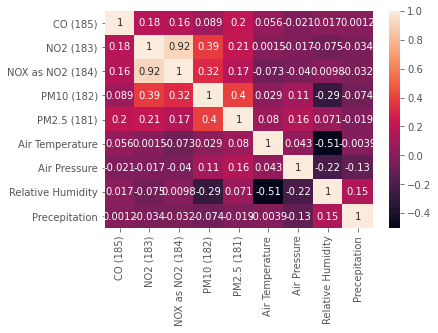

In [209]:
corl = station_8779.corr()
sns.heatmap(corl,annot=True)
plt.show()

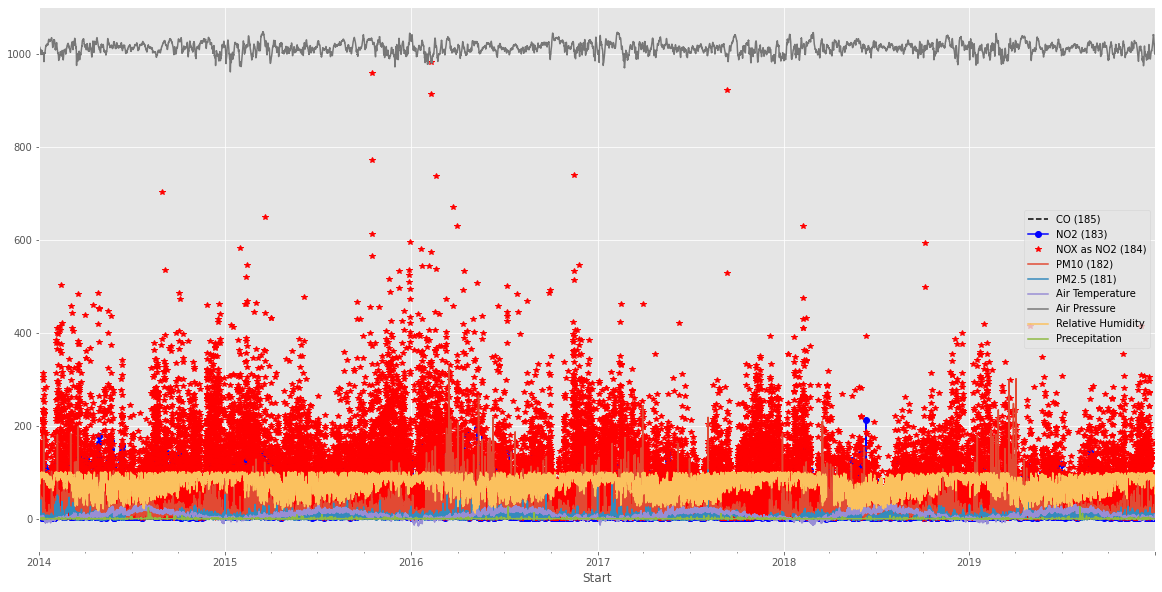

In [210]:
station_8779.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

**Missing values Plot**

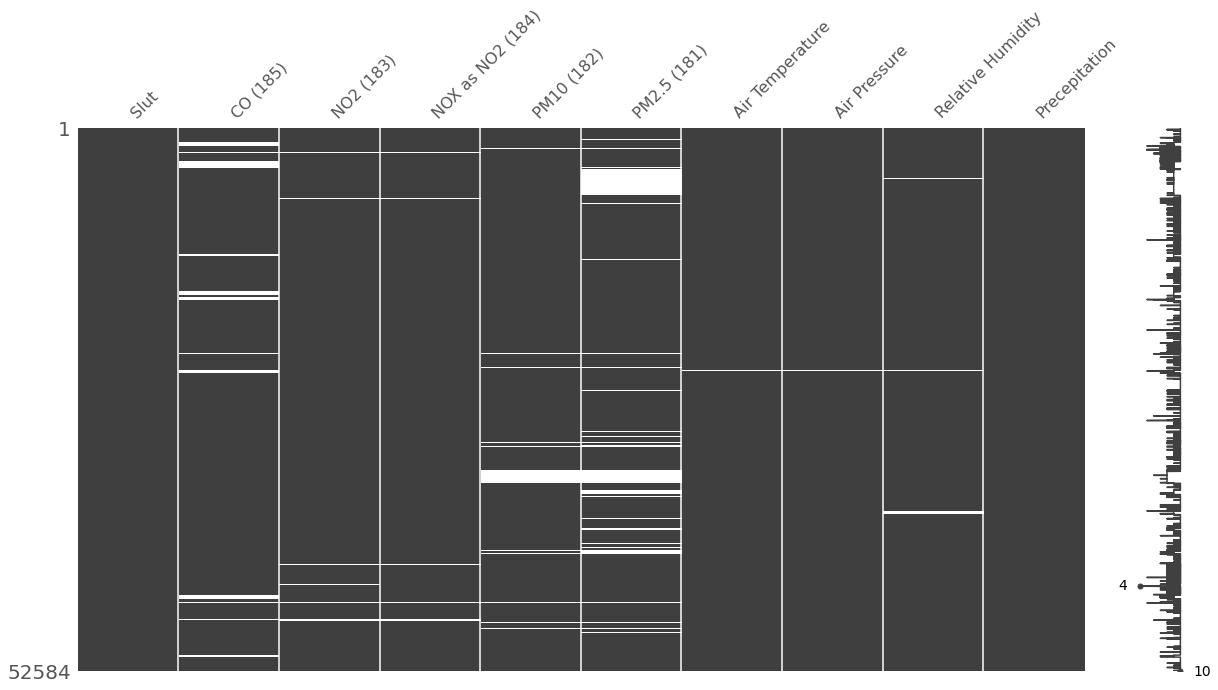

In [211]:
import missingno as mno
mno.matrix(station_8779, figsize = (20,10))

From the above plot. There are 8 columns with missing values

In [212]:
station_8779.columns

Index(['Slut', 'CO (185)', 'NO2 (183)', 'NOX as NO2 (184)', 'PM10 (182)',
       'PM2.5 (181)', 'Air Temperature', 'Air Pressure', 'Relative Humidity',
       'Precepitation'],
      dtype='object')

In [213]:
missing_zero_values_table(station_8779)

Your selected dataframe has 10 columns and 52584 Rows.
There are 9 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PM2.5 (181),236,6732,12.8,6968,13.3,float64
CO (185),0,3552,6.8,3552,6.8,float64
PM10 (182),22,2156,4.1,2178,4.1,float64
NO2 (183),0,841,1.6,841,1.6,float64
NOX as NO2 (184),0,645,1.2,645,1.2,float64
Relative Humidity,0,375,0.7,375,0.7,float64
Precepitation,47223,186,0.4,47409,90.2,float64
Air Pressure,0,27,0.1,27,0.1,float64
Air Temperature,247,23,0.0,270,0.5,float64


In [214]:
df = station_8779
df.head()

,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
Start,,,,,,,,,,
2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


In [215]:
print(df.head())

                                 Slut  ...  Precepitation
Start                                  ...               
2014-01-01 00:00:00  2014-01-01 01:00  ...            0.0
2014-01-01 01:00:00  2014-01-01 02:00  ...            0.0
2014-01-01 02:00:00  2014-01-01 03:00  ...            0.0
2014-01-01 03:00:00  2014-01-01 04:00  ...            0.0
2014-01-01 04:00:00  2014-01-01 05:00  ...            0.0

[5 rows x 10 columns]


In [233]:
df['PM10 (182)'].values.flatten()

array([69.8, 23.9, 13.9, ..., 26.9, 42.2, 75.6])

ValueError: ignored

In [ ]:
# df.columns[df.isnull().any()]
# df.columns[df.isnull().any()].tolist() # to get a list instead of an Index object

In [ ]:
# n_miss_pm10 = df['Air Pressure'].isnull().sum()
# perc = n_miss_pm10 / df.shape[0] * 100
# print(n_miss_pm10, perc)

In [ ]:
#df[df['Air Pressure'].isnull()].index.tolist()
#df[df['PM10 (182)']<0].index.tolist()
# df[df['PM10 (182)']<0].sum()

In [223]:
missing_zero_values_table(df)

Your selected dataframe has 10 columns and 52584 Rows.
There are 9 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PM2.5 (181),236,6732,12.8,6968,13.3,float64
CO (185),0,3552,6.8,3552,6.8,float64
PM10 (182),22,2156,4.1,2178,4.1,float64
NO2 (183),0,841,1.6,841,1.6,float64
NOX as NO2 (184),0,645,1.2,645,1.2,float64
Relative Humidity,0,375,0.7,375,0.7,float64
Precepitation,47223,186,0.4,47409,90.2,float64
Air Pressure,0,27,0.1,27,0.1,float64
Air Temperature,247,23,0.0,270,0.5,float64


In [224]:
df.head()

,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
Start,,,,,,,,,,
2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


In [ ]:
df_linear = df.interpolate(method='linear', limit_direction='forward', axis=0)


In [ ]:
df_linear.head()

In [ ]:
missing_zero_values_table(df_linear)

In [ ]:
mno.matrix(df_linear, figsize = (20,10))

In [ ]:
df_linear['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:
# from google.colab import drive
# drive.mount('/drive')
#df_linear.to_csv('/drive/My Drive/Bunu/linear1.csv')

In [ ]:
df_slinear = df.interpolate(method='slinear',  axis=0)


In [ ]:
missing_zero_values_table(df_slinear)


In [ ]:
df['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:
df_slinear['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:
df_slinear.plot(subplots=True, figsize=(20,16));

In [ ]:
#df_slinear.to_csv('/drive/My Drive/Bunu/slinear.csv')

In [ ]:
df_quadratic = df.interpolate(method='quadratic', limit_direction='forward', axis=0)


In [ ]:
missing_zero_values_table(df_quadratic)

In [ ]:
df_quadratic['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:

df_nearest = df.interpolate(method='nearest', limit_direction='forward', axis=0)


In [ ]:
missing_zero_values_table(df_nearest)

In [ ]:
df_nearest['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:

df_time = df.interpolate(method='time', limit_direction='forward', axis=0)


In [ ]:
missing_zero_values_table(df_time)

In [ ]:
df_time['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:
mno.matrix(df_time, figsize = (20,10))

In [ ]:
df_PM10 = df['PM10 (182)']
df_PM10.head()

In [ ]:
#Resampling PM10 weekly
weekly = df_PM10.resample('W').sum()
weekly.plot (style=[':','--','-'])

In [ ]:
#Resampling
weekly = df.resample('W').sum()
weekly.plot (style=[':','--','-'])

In [ ]:
#Daily
daily = df.resample('D').sum()
daily.rolling (30, center=True).sum().plot(style=[':','--','-'])

In [ ]:
#Daily resampling PM10
daily = df_PM10.resample('D').sum()
daily.rolling (30, center=True).sum().plot(style=[':','--','-'])

In [ ]:
#hourly
by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

In [ ]:
#hourly resampling PM10
#hourly
by_time = df_PM10.groupby(df_PM10.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

Modelling with prophet
Prophet is designed for analyzing time series with daily observations that display patterns on different time scales. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Before using Prophet, we rename the columns in our data to the correct format. The Date column must be called ‘ds’ and the value column we want to predict ‘y’

In [ ]:
#LSTM(Long Short Term Memory) prediction
mydata = df.loc[:,['PM10 (182)']]
# mydata = mydata.set_index(df)
mydata.head()

In [ ]:
#normalizing-rescale the data o the range of [0,1]or[-1,1]
from sklearn.preprocessing import MinMaxScaler
values = mydata['PM10 (182)'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [ ]:
#splitting the dataset
train_size = int (len(scaled) * 0.8)
test_size = len (scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print (len(train), len(test))

defining a function to create a new dataset and use this function to prepare the train and test datasets for modeling.

In [ ]:
def create_dataset (dataset, look_back=1):
  dataX, dataY =[], []
  for i in range(len(dataset)-look_back):
    a = dataset[i:(i+ look_back),0]
    dataX.append(a)
    dataY.append(dataset[i+ look_back,0])
  print(len(dataY))
  return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

Our data is currently in the form [samples, features] and we are framing the problem as two time steps for each sample. We can transform the prepared train and test input data into the expected structure

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1, testX.shape[1]))

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# model = Sequential()
# model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer ='adam')
# history = model.fit(trainX, trainY, epochs=300, batch_size=100, vaidation_data=(testX, testY), verbose= 0, shuffle = False)